Epoch 1/500
10/10 [==============================] - 1s 24ms/step - loss: 2.3099 - categorical_accuracy: 0.0016 - val_loss: 2.2906 - val_categorical_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 2.3053 - categorical_accuracy: 0.0031 - val_loss: 2.2832 - val_categorical_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 2.3009 - categorical_accuracy: 0.0047 - val_loss: 2.2765 - val_categorical_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 2.2923 - categorical_accuracy: 0.0063 - val_loss: 2.2699 - val_categorical_accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 2.2768 - categorical_accuracy: 0.0047 - val_loss: 2.2634 - val_categorical_accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 2.2882 - categorical_accuracy: 0.0000e+00 - val_loss: 2.2571 - val_categorical_ac

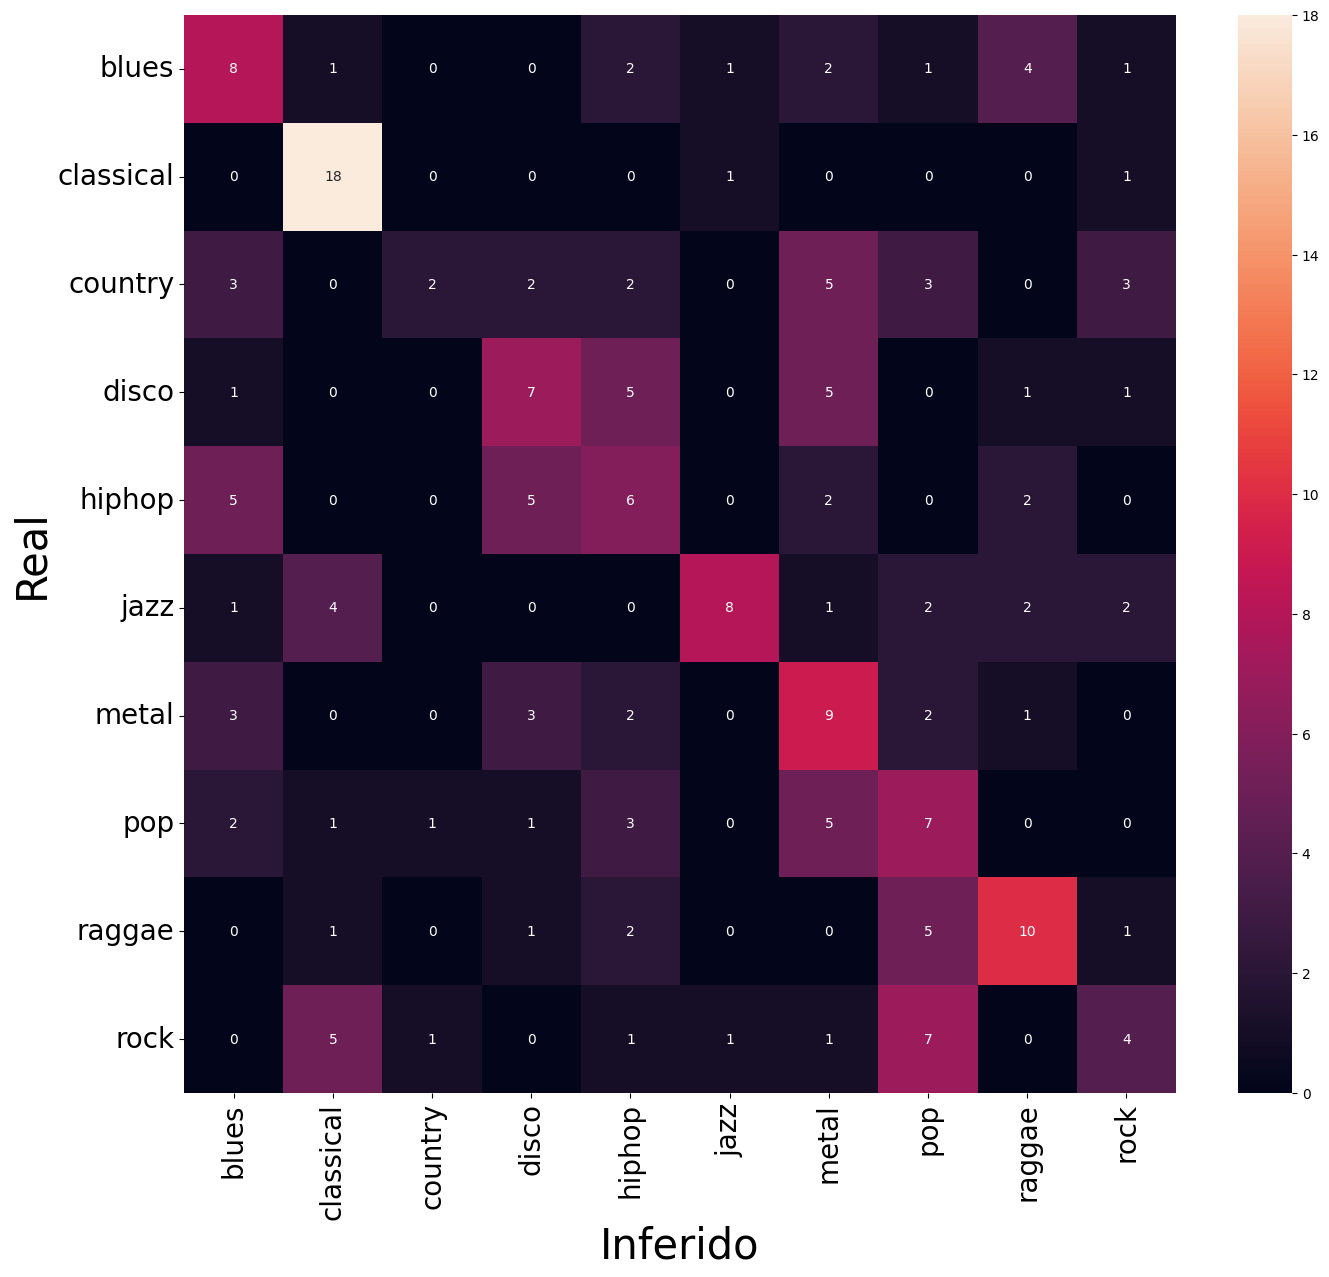

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('features.csv')
df = df.sample(frac = 1)
df.head()

X = df.drop(['class'], axis=1)

y_label = df['class']

encoder = LabelEncoder()

encoder.fit(y_label)
y = encoder.transform(y_label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(6, 1)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])


model.fit(X_train, y_train, epochs=500, batch_size= 64, validation_split=0.2)
model.evaluate(X_test,  y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(1)

print('Accuracy'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred,))

cm = confusion_matrix(y_test, y_pred)

class_names = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'raggae', 'rock']

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.color_palette("flare", as_cmap=True)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Inferido', fontsize=30)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('Real', fontsize=30)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.show()

plt.show()

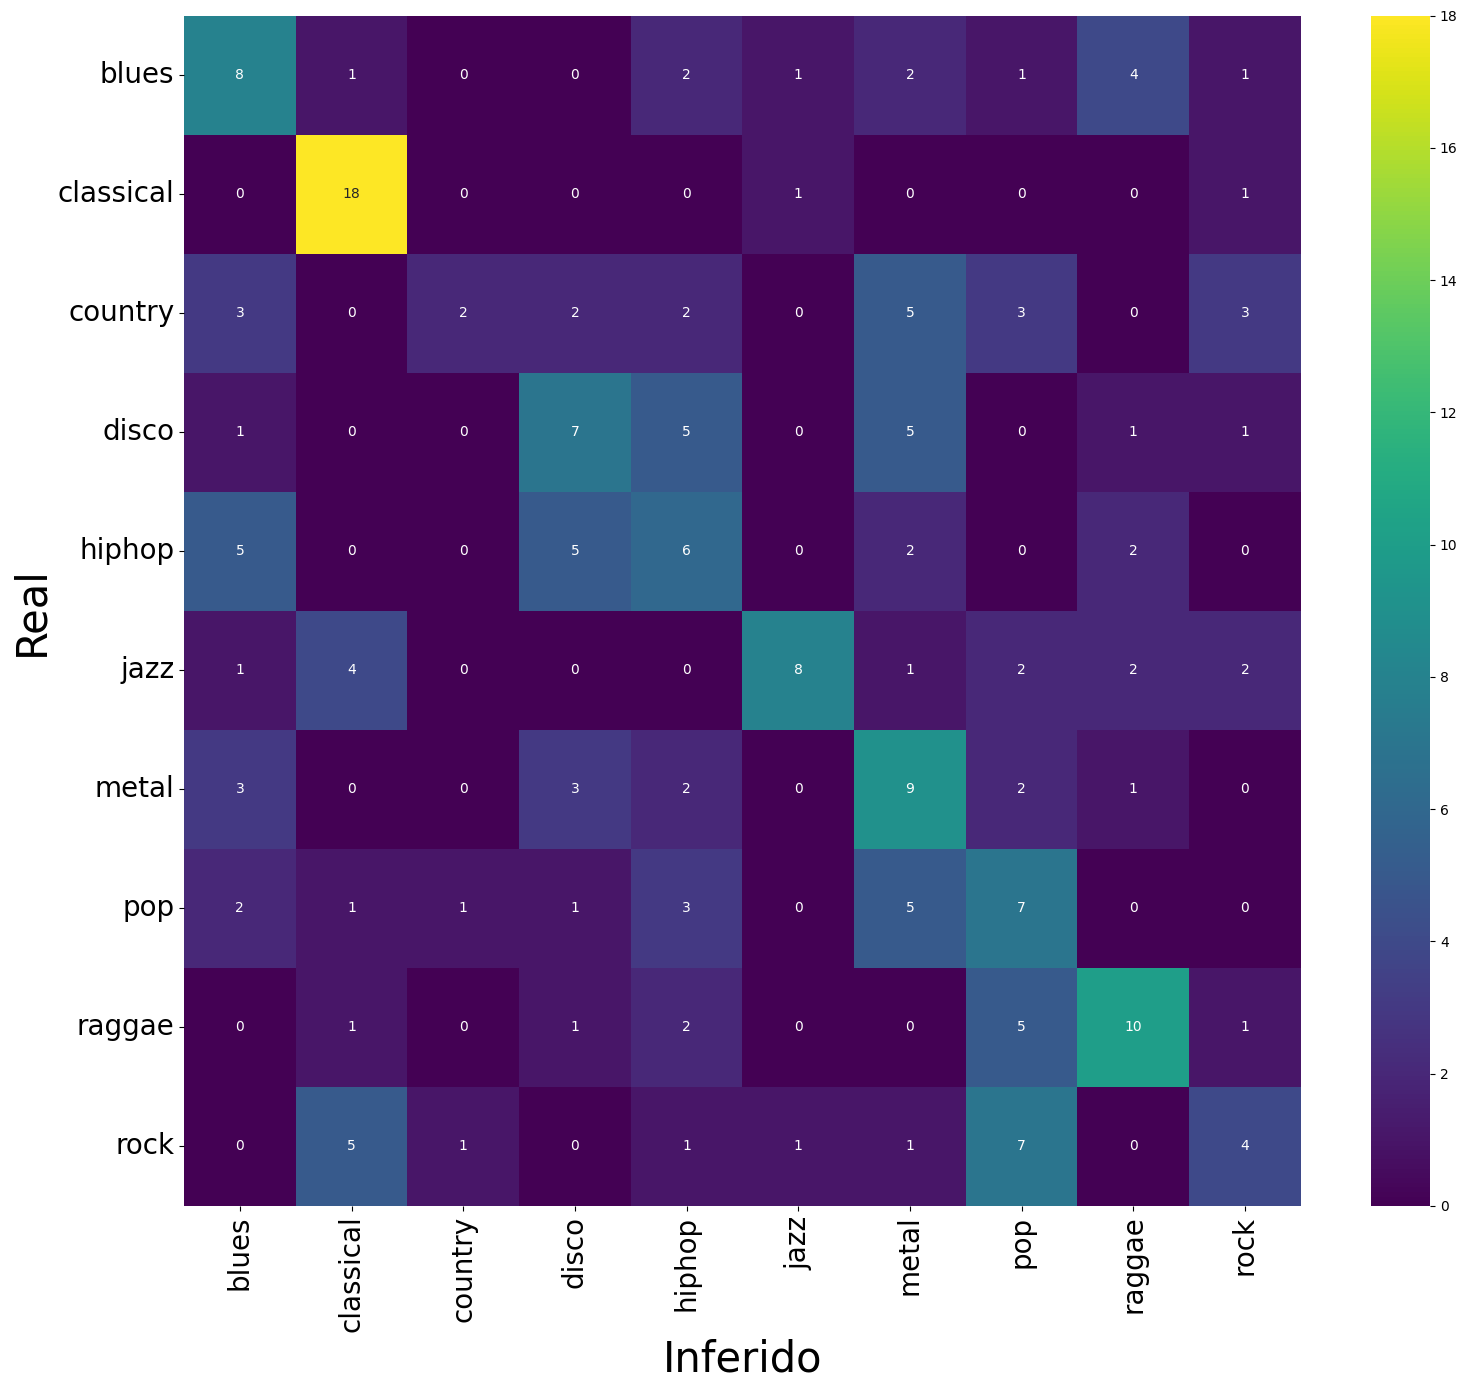

In [ ]:
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()

#palette = sns.color_palette("blend:#03051a,#d72549", as_cmap=True)
palette = sns.color_palette("viridis", as_cmap= True)

sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', cmap = palette)


ax.set_xlabel('Inferido', fontsize=30)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('Real', fontsize=30)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('modelo323232.png')
plt.show()


In [36]:
model.save('modelo.keras')
#plt.savefig('modelo323232.png')


In [38]:
model_ =  tf.keras.models.load_model('teste.keras')
model_.evaluate(X_test,  y_test)

y_pred = model_.predict(X_test)
y_pred = y_pred.argmax(1)

print('Accuracy'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred,))

cm = confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 6ms/step
Accuracy
              precision    recall  f1-score   support

           0       0.35      0.40      0.37        20
           1       0.60      0.90      0.72        20
           2       0.50      0.10      0.17        20
           3       0.37      0.35      0.36        20
           4       0.26      0.30      0.28        20
           5       0.73      0.40      0.52        20
           6       0.30      0.45      0.36        20
           7       0.26      0.35      0.30        20
           8       0.50      0.50      0.50        20
           9       0.31      0.20      0.24        20

    accuracy                           0.40       200
   macro avg       0.42      0.40      0.38       200
weighted avg       0.42      0.40      0.38       200

